<a href="https://colab.research.google.com/github/SiriBatchu/Data-preparation_EDA_Visualization/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

from itertools import combinations
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA as ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
data = pd.read_csv('/content/avocado.csv')
data = data.drop('Unnamed: 0',axis = 1)
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany


In [ ]:
data.shape

(18249, 13)

In [ ]:
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


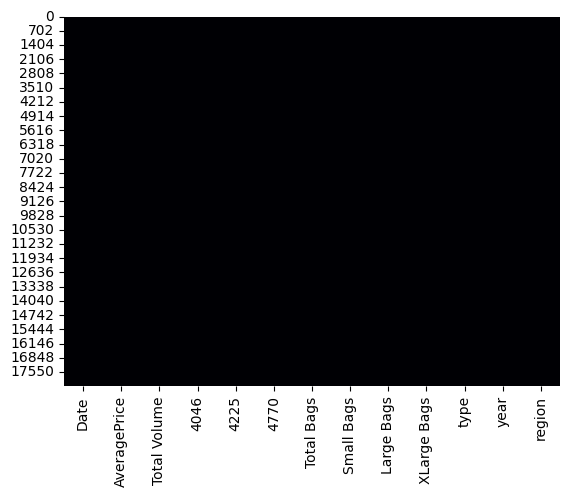

In [ ]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.00,1.41,0.40,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.00,850644.01,3453545.36,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.00,293008.42,1264989.08,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.00,295154.57,1204120.40,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.00,22839.74,107464.07,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.00,239639.20,986242.40,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.00,182194.69,746178.51,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.00,54338.09,243965.96,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.00,3106.43,17692.89,0.00,0.00,0.00,132.50,551693.65
year,18249.00,2016.15,0.94,2015.00,2015.00,2016.00,2017.00,2018.00


In [ ]:
df1 = data.copy(deep = True)
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date',inplace = True)
df1 = df1.resample('W').sum()
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,140.54,84674337.20,33098258.74,36851038.43,2278818.64,12446221.39,9910008.90,2485655.90,50556.59,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-11,148.03,78555807.24,31024164.99,32808429.84,2349167.45,12374044.96,10352936.42,1977832.00,43276.54,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-18,150.24,78388784.08,31802706.86,31662041.93,2208250.55,12715784.74,10548854.11,2145586.13,21344.50,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-25,150.89,76466281.07,32305132.87,28929122.37,2078378.86,13153646.97,10877316.95,2252815.92,23514.10,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-02-01,134.68,119453235.25,50292988.96,50696230.48,3687489.31,14776526.50,11576833.65,3073989.39,125703.46,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...


# EDA

<ipython-input-14-4991e3ad2080>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['AveragePrice']);
<ipython-input-14-4991e3ad2080>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['AveragePrice']);
<ipython-input-14-4991e3ad2080>:14: UserWarning: Ignoring `palette` because no `hue` vari

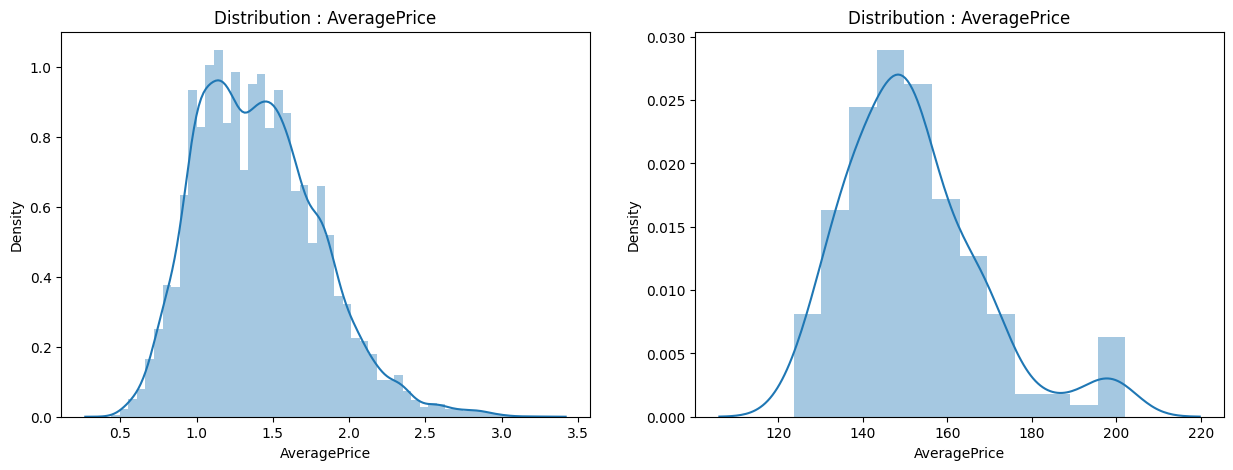

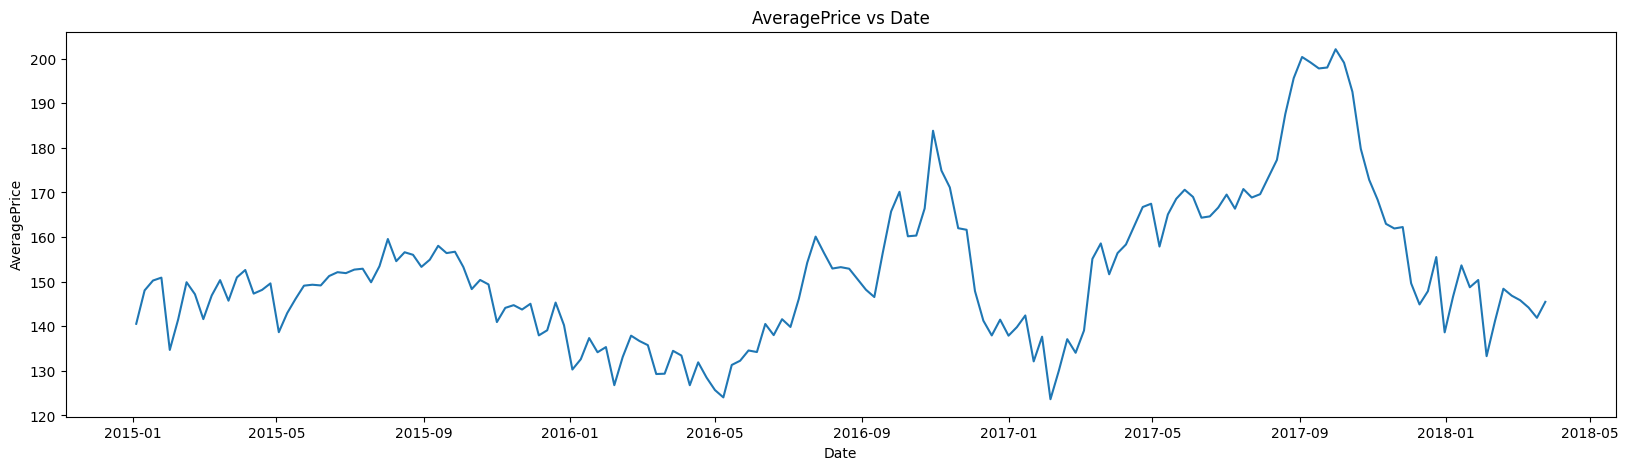

In [ ]:
color1 = ['#296C92','#3EB489']
fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))

plt.subplot(1,2,1)
sns.distplot(data['AveragePrice']);
plt.title('Distribution : AveragePrice')

plt.subplot(1,2,2)
sns.distplot(df1['AveragePrice']);
plt.title('Distribution : AveragePrice')

fig,ax = plt.subplots(nrows = 1, ncols = 1,figsize = (20,5))
plt.subplot(1,1,1)
sns.lineplot(x = df1.index ,y = 'AveragePrice',data = df1,palette = color1);
plt.title('AveragePrice vs Date')

plt.show()
fig.tight_layout(pad = 2)

In [ ]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

numerical_features.remove('Date')
numerical_features.remove('AveragePrice')
numerical_features.remove('region')
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : type year
Numerical Features : Total Volume 4046 4225 4770 Total Bags Small Bags Large Bags XLarge Bags


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['type'] = le.fit_transform(data['type'])

<ipython-input-15-d541d5ab684f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[categorical_features[i]],kde_kws = {'bw' : 1});
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-15-d541d5ab684f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use 

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7d004c9263b0> (for post_execute):


KeyboardInterrupt: 

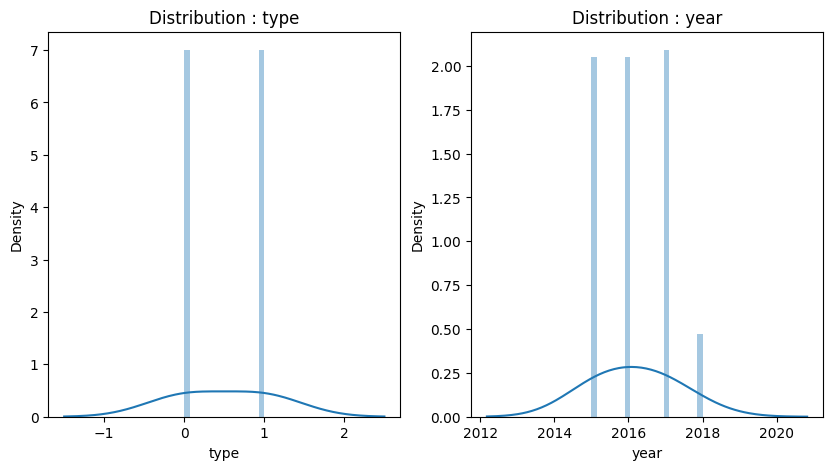

Error in callback <function flush_figures at 0x7d004c925090> (for post_execute):


KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,5))
for i in range(len(categorical_features)):

    plt.subplot(1,2,i+1)
    sns.distplot(data[categorical_features[i]],kde_kws = {'bw' : 1});
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

fig, ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,5))
for i in range(len(categorical_features)):

    plt.subplot(1,2,i+1)
    sns.countplot(data[categorical_features[i]],palette = color1);
    title = 'Count : ' + categorical_features[i]
    plt.title(title)

<ipython-input-17-6a38285707c4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = categorical_features[i],y = 'AveragePrice',data = data,palette = color1,edgecolor = 'black')
<ipython-input-17-6a38285707c4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = categorical_features[i],y = 'AveragePrice',data = data,palette = color1,edgecolor = 'black')
<ipython-input-17-6a38285707c4>:5: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = categorical_features[i],y = 'AveragePrice',data = data,palette = color1,edgecolor = 'black')


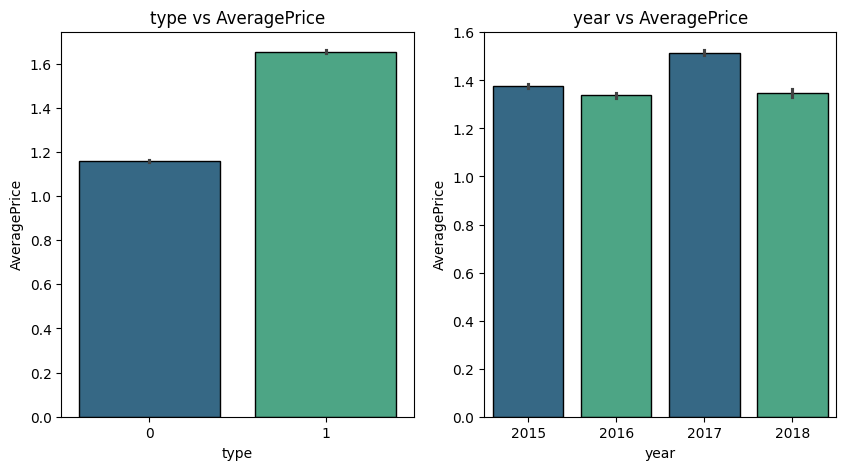

In [ ]:
fig, ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,5))
for i in range(len(categorical_features)):

    plt.subplot(1,2,i+1)
    sns.barplot(x = categorical_features[i],y = 'AveragePrice',data = data,palette = color1,edgecolor = 'black')
    title = categorical_features[i] + ' vs AveragePrice'
    plt.title(title);

<ipython-input-18-a5ddc8c78660>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[numerical_features[i]])
<ipython-input-18-a5ddc8c78660>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[numerical_features[i]])
<ipython-input-18-a5ddc8c78660>:4: UserWarning: 

`distplot` is a deprecated f

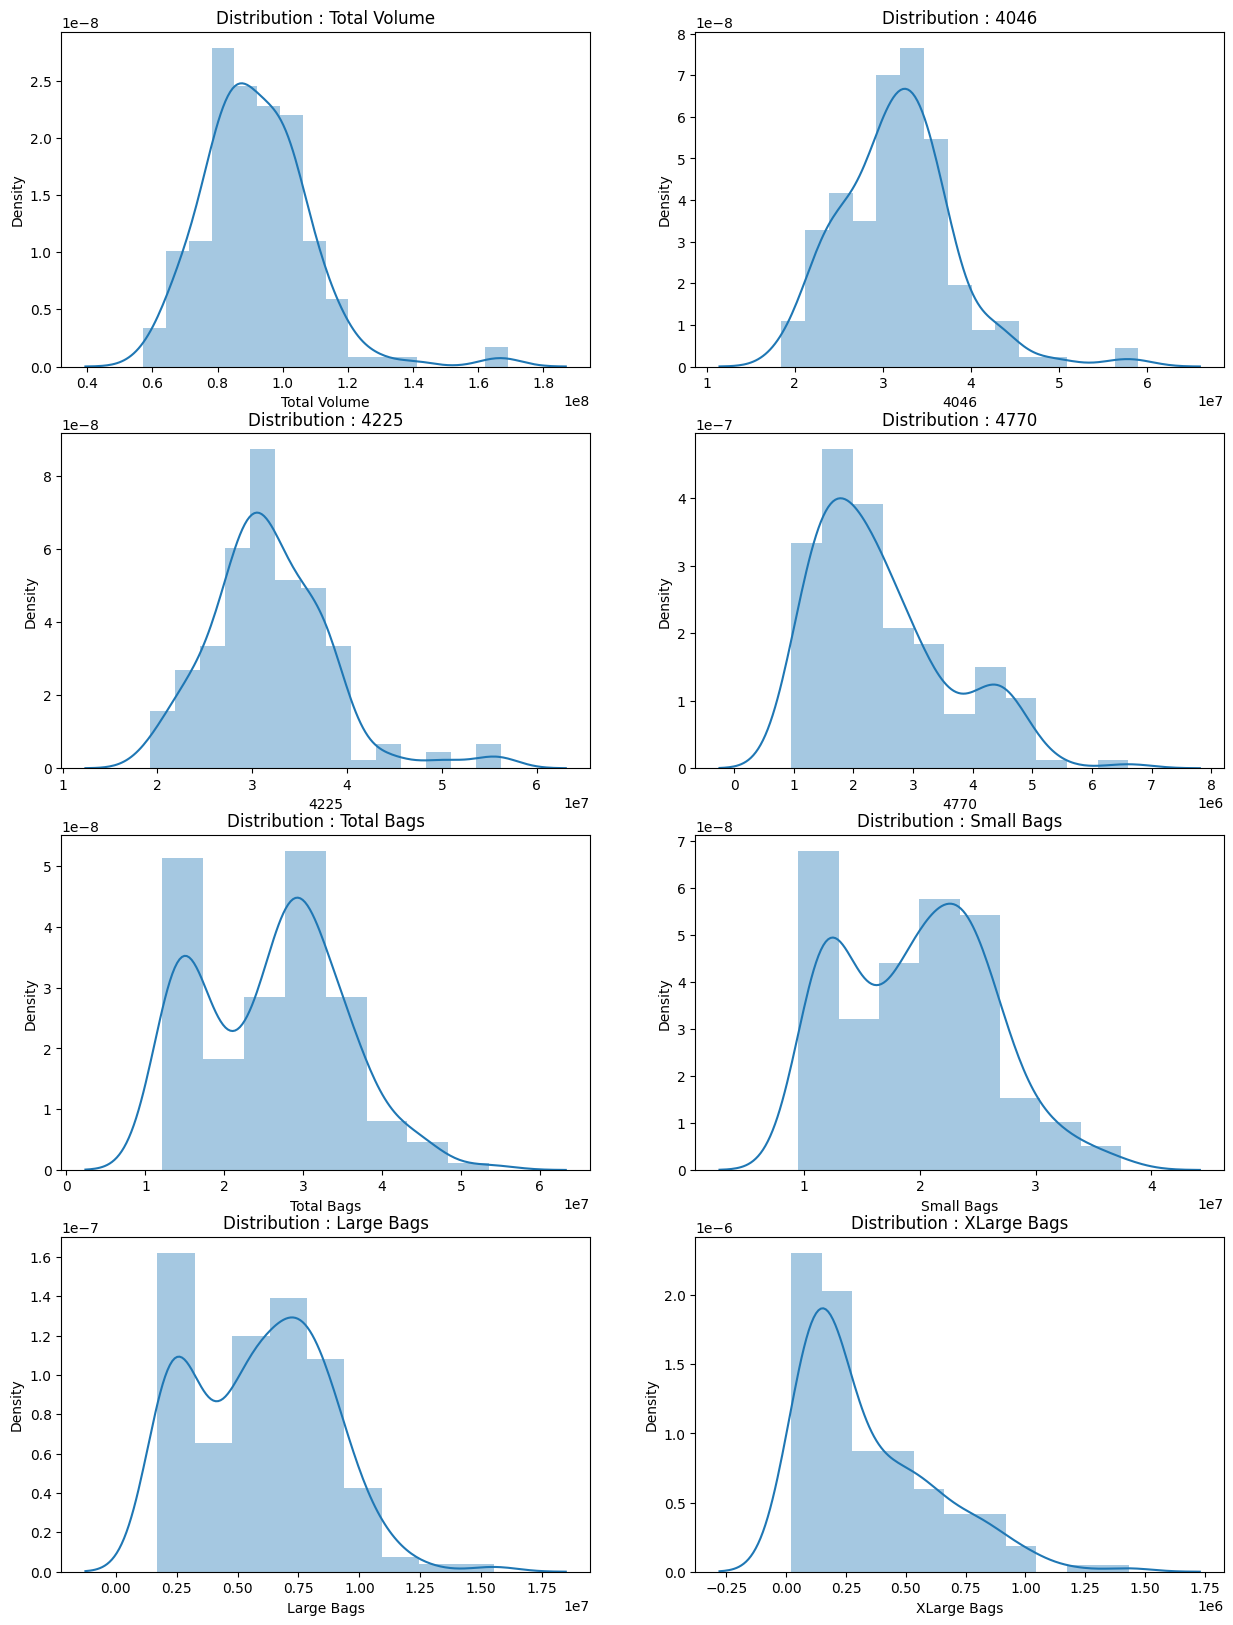

In [ ]:
fig, ax = plt.subplots(nrows = 4,ncols = 2,figsize = (15,20))
for i in range(len(numerical_features)):
    plt.subplot(4,2,i+1)
    sns.distplot(df1[numerical_features[i]])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()
fig.tight_layout(h_pad = 10,w_pad = 5)

In [ ]:
total_volume = [sum(data[data['type'] == 0]['Total Volume']) / sum(data['Total Volume']) * 100,
                sum(data[data['type'] == 1]['Total Volume']) / sum(data['Total Volume']) * 100]

avocado_4046 = [sum(data[data['type'] == 0]['4046']) / sum(data['4046']) * 100,
                sum(data[data['type'] == 1]['4046']) / sum(data['4046']) * 100]

avocado_4225 = [sum(data[data['type'] == 0]['4225']) / sum(data['4225']) * 100,
                sum(data[data['type'] == 1]['4225']) / sum(data['4225']) * 100]

avocado_4770 = [sum(data[data['type'] == 0]['4770']) / sum(data['4770']) * 100,
                sum(data[data['type'] == 1]['4770']) / sum(data['4770']) * 100]

total_bags = [sum(data[data['type'] == 0]['Total Bags']) / sum(data['Total Bags']) * 100,
              sum(data[data['type'] == 1]['Total Bags']) / sum(data['Total Bags']) * 100]

small_bags = [sum(data[data['type'] == 0]['Small Bags']) / sum(data['Small Bags']) * 100,
              sum(data[data['type'] == 1]['Small Bags']) / sum(data['Small Bags']) * 100]

large_bags = [sum(data[data['type'] == 0]['Large Bags']) / sum(data['Large Bags']) * 100,
              sum(data[data['type'] == 1]['Large Bags']) / sum(data['Large Bags']) * 100]

xlarge_bags = [sum(data[data['type'] == 0]['XLarge Bags']) / sum(data['XLarge Bags']) * 100,
               sum(data[data['type'] == 1]['XLarge Bags']) / sum(data['XLarge Bags']) * 100]

type_numerical_features_percentage = [total_volume,avocado_4046,avocado_4225,avocado_4770,
                          total_bags,small_bags,large_bags,xlarge_bags]

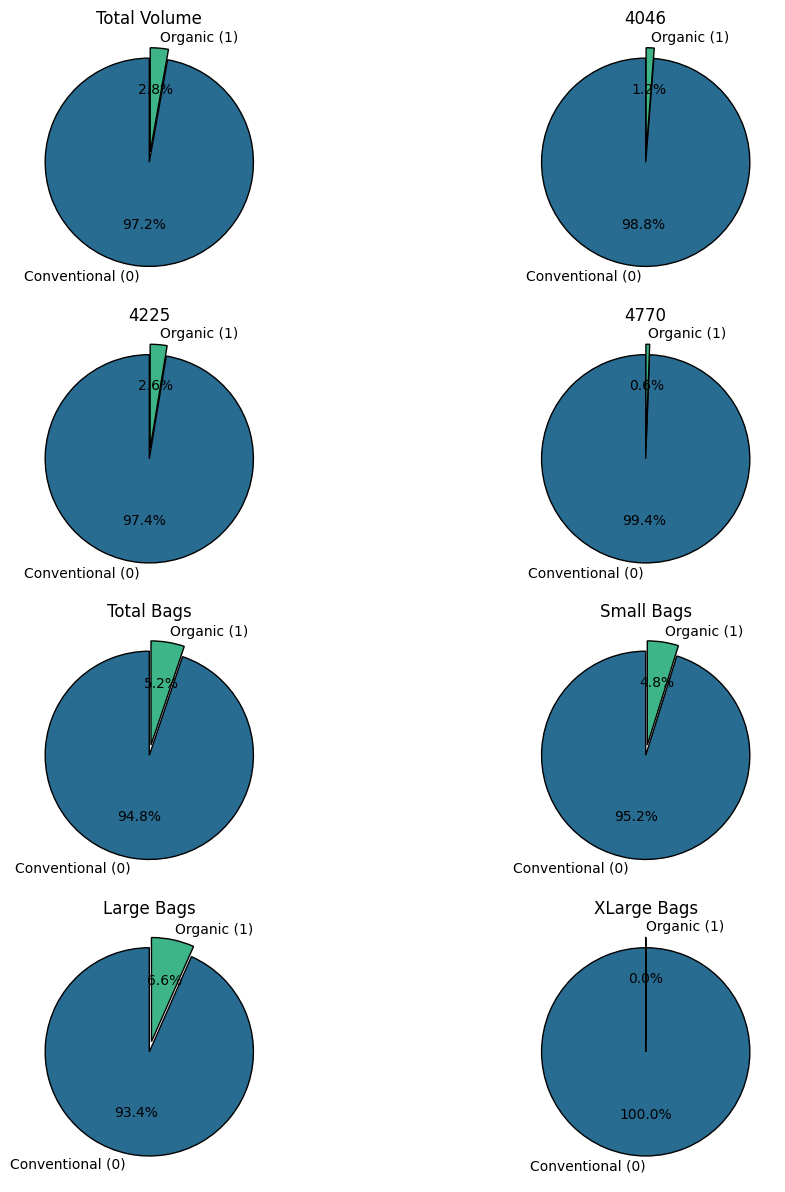

In [ ]:
fig, ax = plt.subplots(nrows = 4,ncols = 2,figsize = (12,12))

for i in range(len(numerical_features)):
    plt.subplot(4,2,i + 1)
    plt.pie(type_numerical_features_percentage[i],labels = ['Conventional (0)','Organic (1)'],autopct = '%1.1f%%',
            startangle = 90, explode = (0,0.1), colors = color1,
            wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    title = numerical_features[i]
    plt.title(title);

fig.tight_layout(pad = 1)

In [ ]:
total_volume = [sum(data[data['year'] == 2015]['Total Volume']) / sum(data['Total Volume']) * 100,
                sum(data[data['year'] == 2016]['Total Volume']) / sum(data['Total Volume']) * 100,
                sum(data[data['year'] == 2017]['Total Volume']) / sum(data['Total Volume']) * 100,
                sum(data[data['year'] == 2018]['Total Volume']) / sum(data['Total Volume']) * 100]

avocado_4046 = [sum(data[data['year'] == 2015]['4046']) / sum(data['4046']) * 100,
                sum(data[data['year'] == 2016]['4046']) / sum(data['4046']) * 100,
                sum(data[data['year'] == 2017]['4046']) / sum(data['4046']) * 100,
                sum(data[data['year'] == 2018]['4046']) / sum(data['4046']) * 100]

avocado_4225 = [sum(data[data['year'] == 2015]['4225']) / sum(data['4225']) * 100,
                sum(data[data['year'] == 2016]['4225']) / sum(data['4225']) * 100,
                sum(data[data['year'] == 2017]['4225']) / sum(data['4225']) * 100,
                sum(data[data['year'] == 2018]['4225']) / sum(data['4225']) * 100]
avocado_4770 = [sum(data[data['year'] == 2015]['4770']) / sum(data['4770']) * 100,
                sum(data[data['year'] == 2016]['4770']) / sum(data['4770']) * 100,
                sum(data[data['year'] == 2017]['4770']) / sum(data['4770']) * 100,
                sum(data[data['year'] == 2018]['4770']) / sum(data['4770']) * 100]

total_bags = [sum(data[data['year'] == 2015]['Total Bags']) / sum(data['Total Bags']) * 100,
              sum(data[data['year'] == 2016]['Total Bags']) / sum(data['Total Bags']) * 100,
              sum(data[data['year'] == 2017]['Total Bags']) / sum(data['Total Bags']) * 100,
              sum(data[data['year'] == 2018]['Total Bags']) / sum(data['Total Bags']) * 100]

small_bags = [sum(data[data['year'] == 2015]['Small Bags']) / sum(data['Small Bags']) * 100,
              sum(data[data['year'] == 2016]['Small Bags']) / sum(data['Small Bags']) * 100,
              sum(data[data['year'] == 2017]['Small Bags']) / sum(data['Small Bags']) * 100,
              sum(data[data['year'] == 2018]['Small Bags']) / sum(data['Small Bags']) * 100]

large_bags = [sum(data[data['year'] == 2015]['Large Bags']) / sum(data['Large Bags']) * 100,
              sum(data[data['year'] == 2016]['Large Bags']) / sum(data['Large Bags']) * 100,
              sum(data[data['year'] == 2017]['Large Bags']) / sum(data['Large Bags']) * 100,
              sum(data[data['year'] == 2018]['Large Bags']) / sum(data['Large Bags']) * 100]

xlarge_bags = [sum(data[data['year'] == 2015]['XLarge Bags']) / sum(data['XLarge Bags']) * 100,
               sum(data[data['year'] == 2016]['XLarge Bags']) / sum(data['XLarge Bags']) * 100,
               sum(data[data['year'] == 2017]['XLarge Bags']) / sum(data['XLarge Bags']) * 100,
               sum(data[data['year'] == 2018]['XLarge Bags']) / sum(data['XLarge Bags']) * 100]

year_numerical_features_percentage = [total_volume,avocado_4046,avocado_4225,avocado_4770,
                                      total_bags,small_bags,large_bags,xlarge_bags]

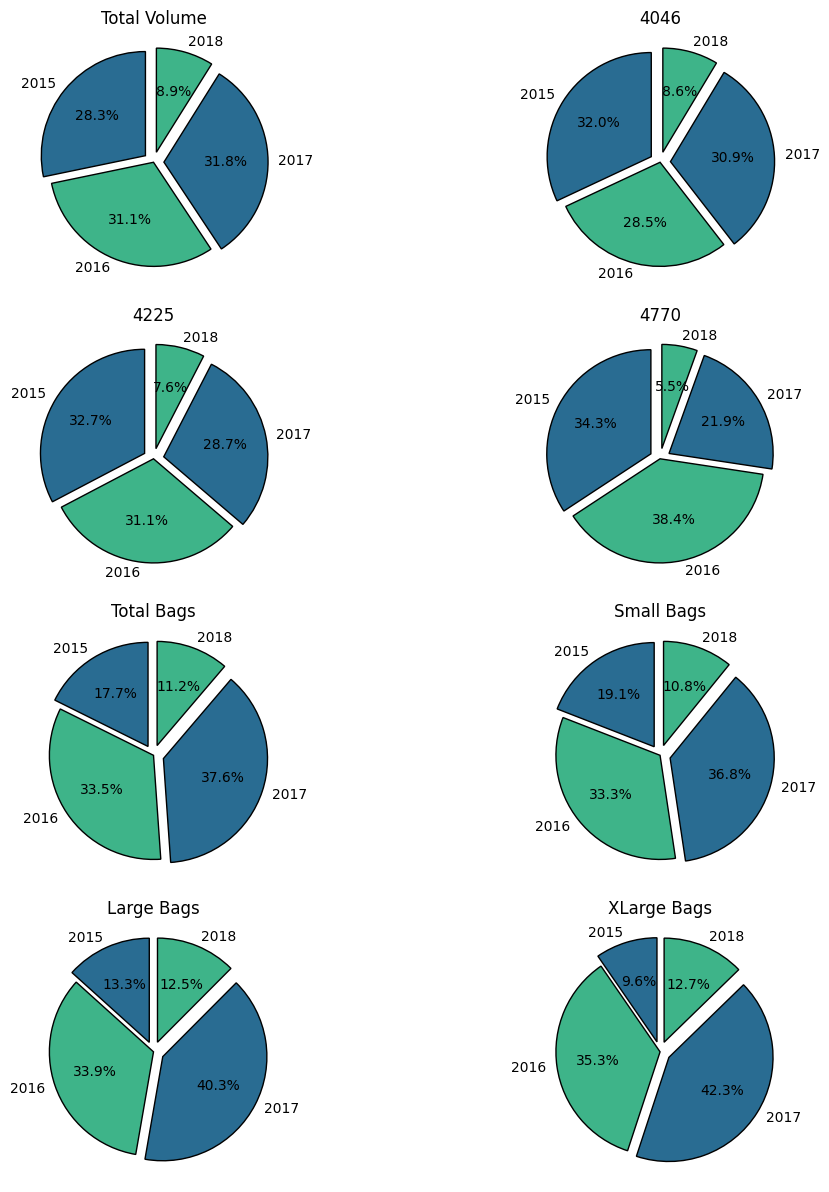

In [ ]:
fig, ax = plt.subplots(nrows = 4,ncols = 2,figsize = (12,12))

for i in range(len(numerical_features)):
    plt.subplot(4,2,i + 1)
    plt.pie(year_numerical_features_percentage[i],labels = ['2015','2016','2017','2018'],autopct = '%1.1f%%',
            startangle = 90, explode = (0.1,0,0.1,0.1), colors = color1,
            wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    title = numerical_features[i]
    plt.title(title);
fig.tight_layout(pad = 1)

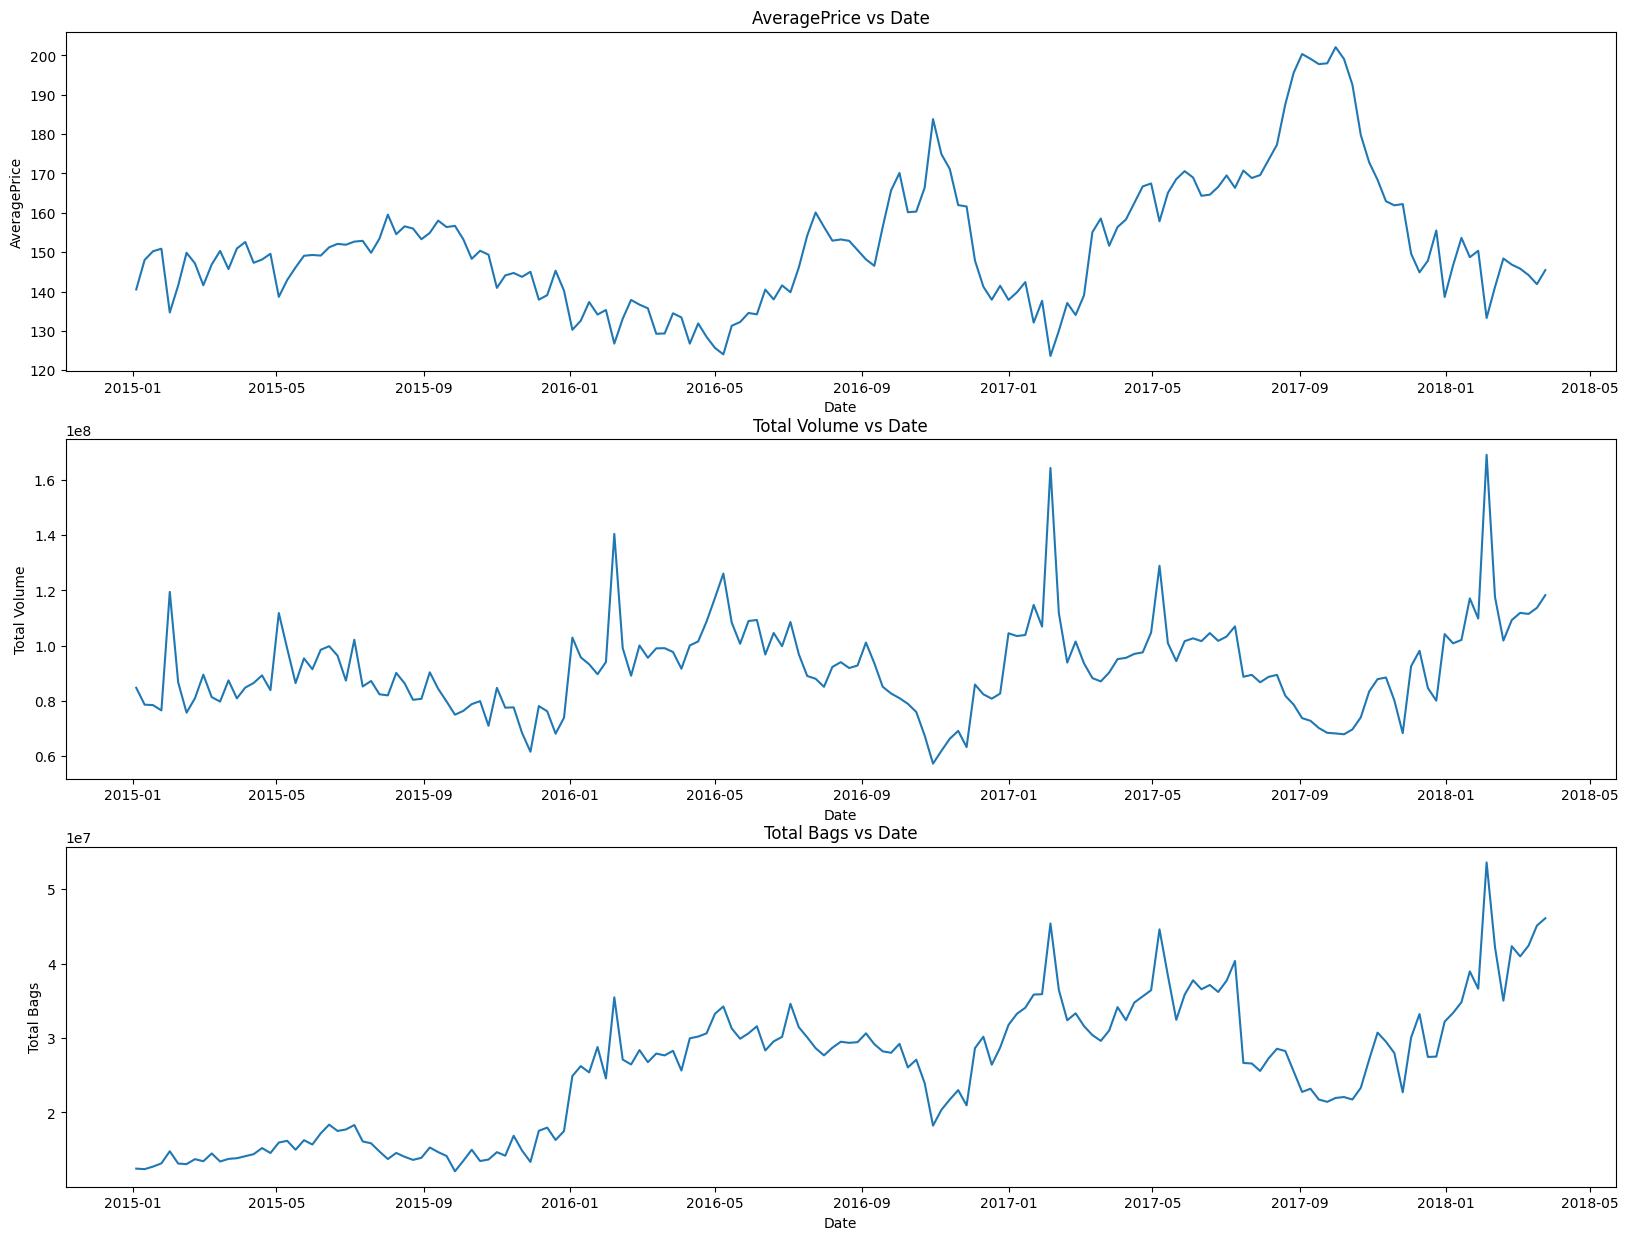

In [ ]:
l1 = ['AveragePrice','Total Volume','Total Bags']
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (20,15))
for i in range(len(l1)):

    plt.subplot(3,1,i+1)
    sns.lineplot(x = df1.index,y = l1[i],data = df1)
    title = l1[i] + ' vs Date'
    plt.title(title);

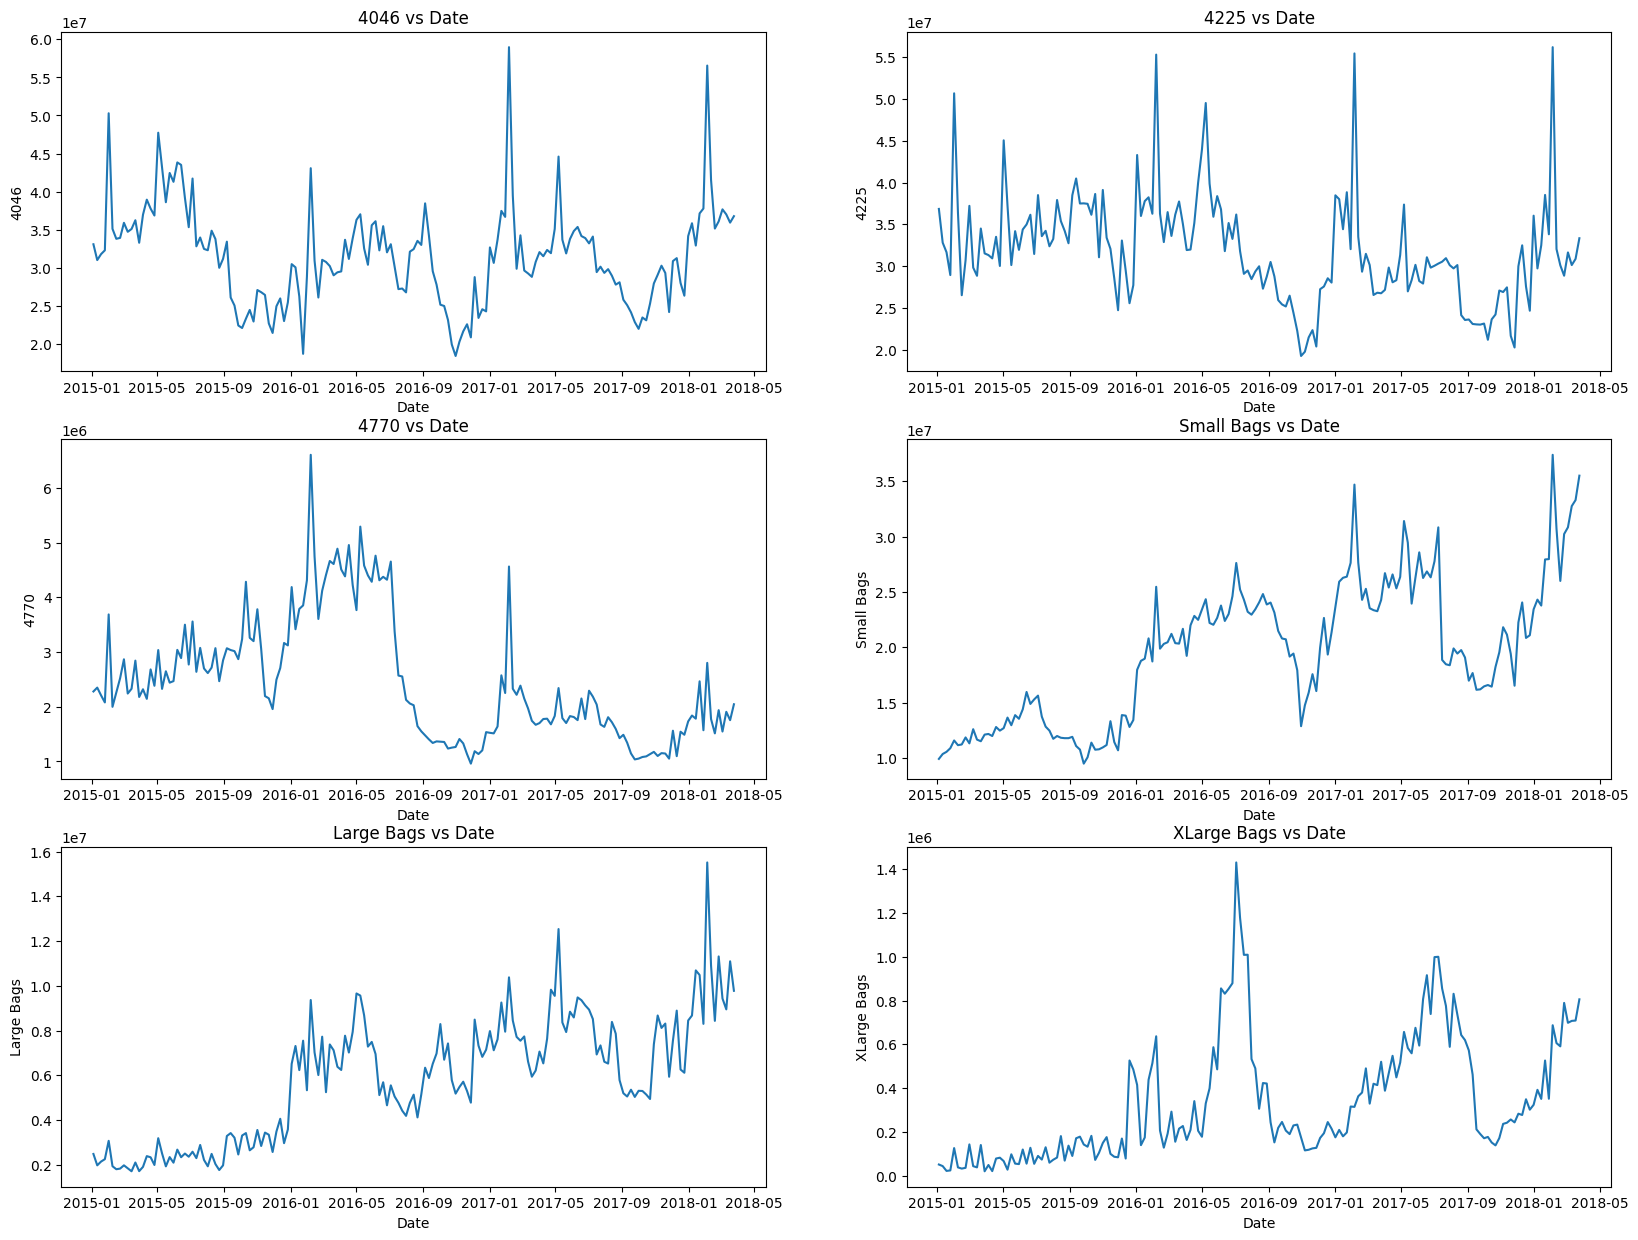

In [ ]:
l2 = ['4046','4225','4770','Small Bags','Large Bags','XLarge Bags']

fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (20,15))
for i in range(len(l2)):

    plt.subplot(3,2,i+1)
    sns.lineplot(x = df1.index,y = l2[i],data = df1)
    title = l2[i] + ' vs Date'
    plt.title(title);

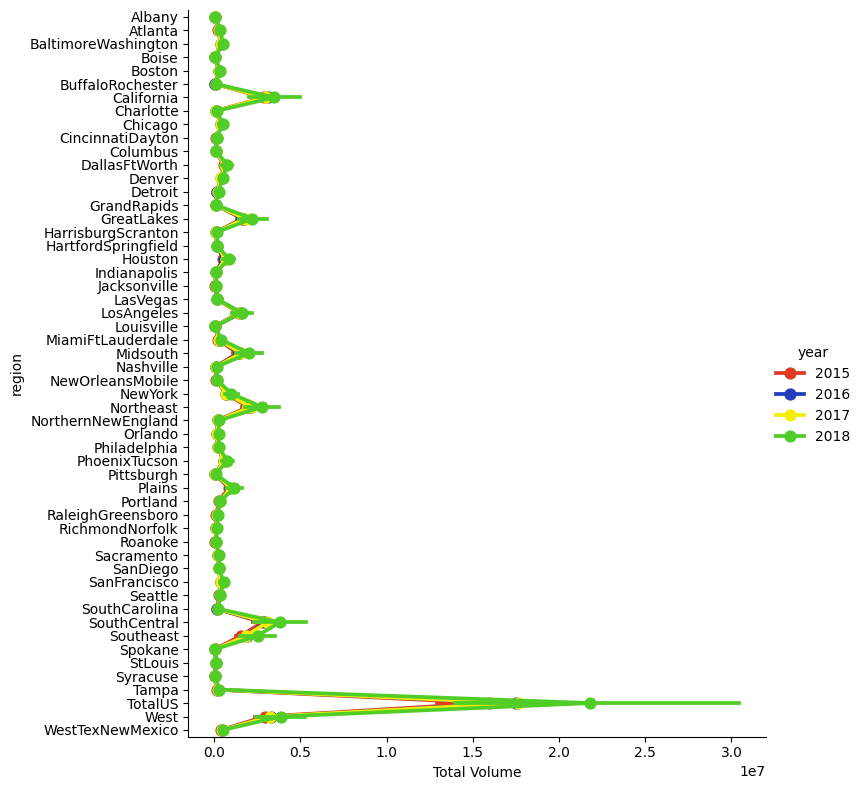

In [ ]:
color2 = ['#DF3C22','#203EB9', '#F5EE04','#50CD27']

# Pass x and y as keyword arguments
sns.catplot(x='Total Volume', y='region', data=data, hue='year', height=8, palette=color2, kind='point');

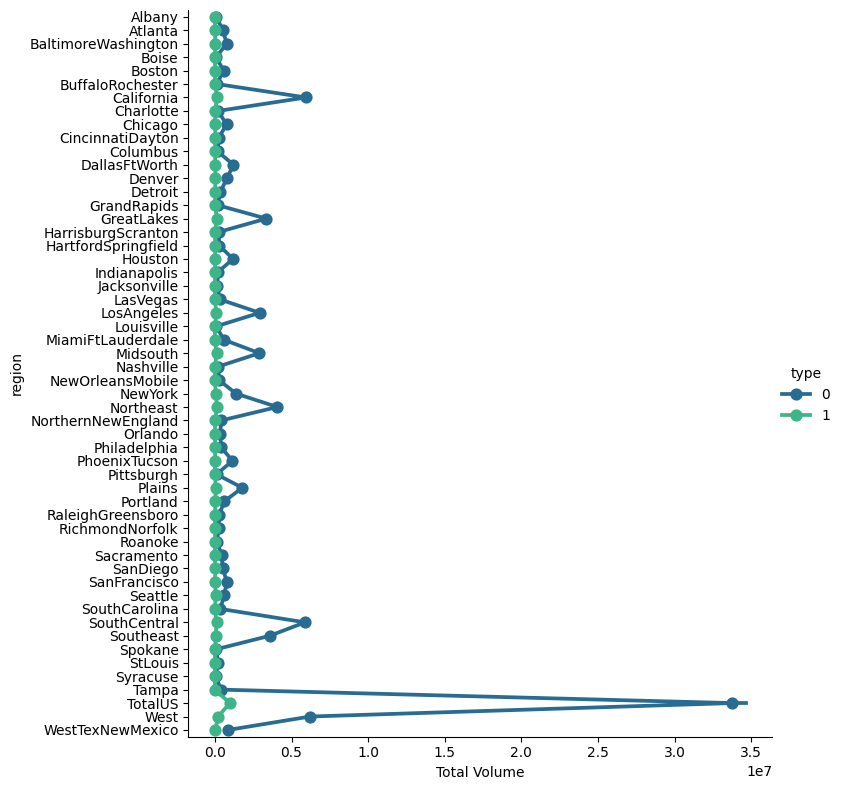

In [ ]:
sns.catplot(x='Total Volume', y='region', data=data, hue='type', height=8, palette=color1, kind='point');

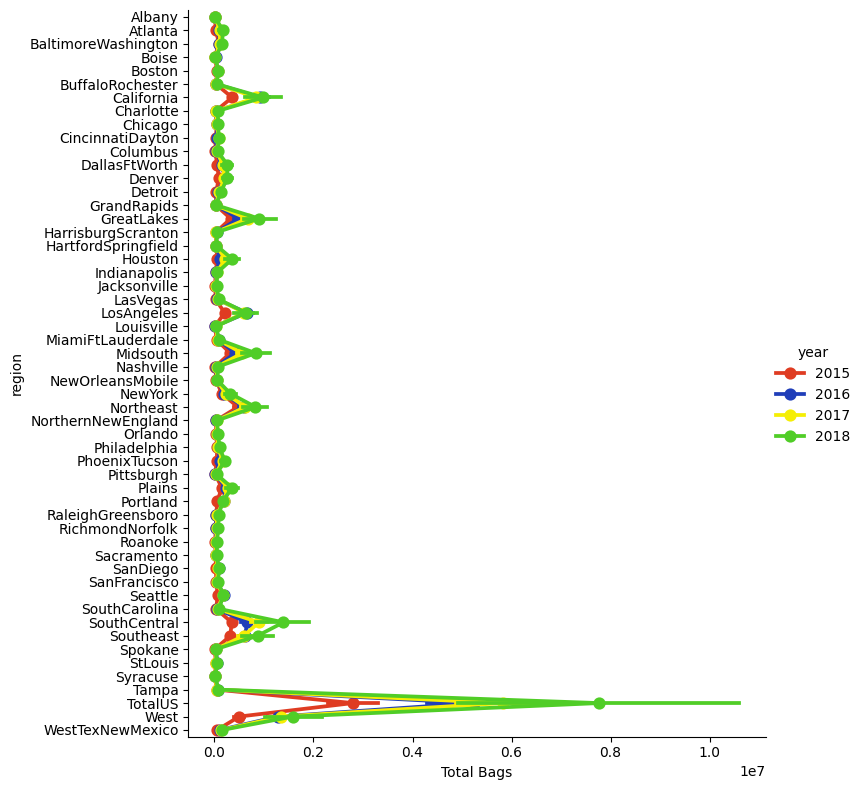

In [ ]:
sns.catplot(x='Total Bags',y='region',data = data,hue = 'year',height = 8,palette = color2,kind = 'point');

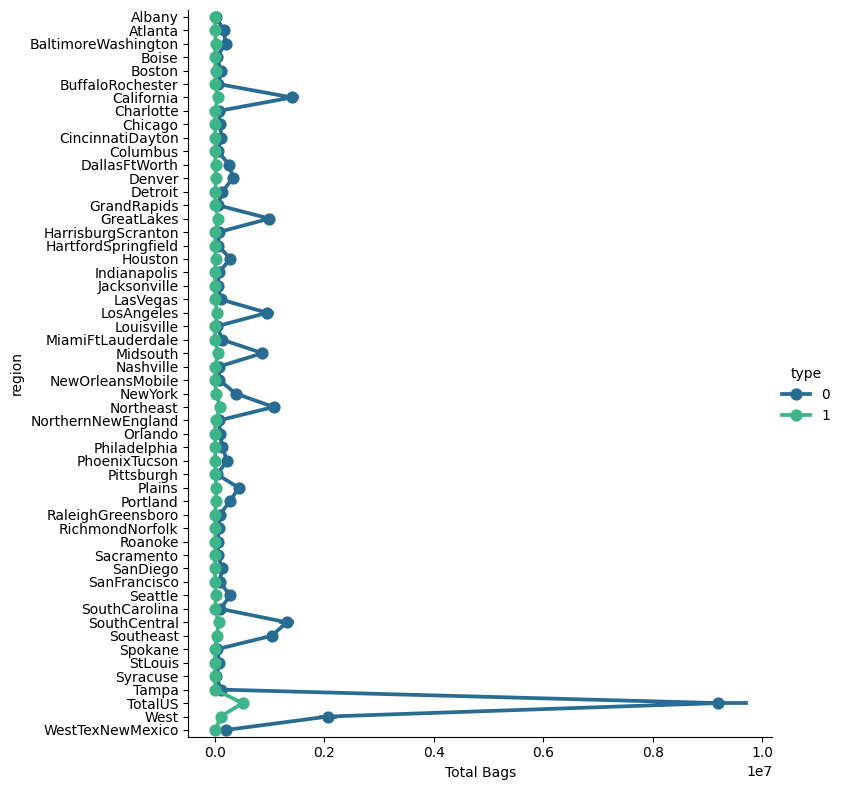

In [ ]:
sns.catplot(x='Total Bags',y='region',data = data,hue = 'type',height = 8,palette = color1,kind = 'point');

# Time Series Analysis

In [ ]:
df1 = data.copy(deep = True)
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date',inplace = True)
df1 = df1.resample('W').sum()
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,140.54,84674337.20,33098258.74,36851038.43,2278818.64,12446221.39,9910008.90,2485655.90,50556.59,54,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-11,148.03,78555807.24,31024164.99,32808429.84,2349167.45,12374044.96,10352936.42,1977832.00,43276.54,54,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-18,150.24,78388784.08,31802706.86,31662041.93,2208250.55,12715784.74,10548854.11,2145586.13,21344.50,54,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-25,150.89,76466281.07,32305132.87,28929122.37,2078378.86,13153646.97,10877316.95,2252815.92,23514.10,54,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-02-01,134.68,119453235.25,50292988.96,50696230.48,3687489.31,14776526.50,11576833.65,3073989.39,125703.46,54,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...


In [ ]:
l3 = list(df1.columns)
l3.remove('AveragePrice')

df1.drop(columns = l3,inplace =True)
df1.head()

,AveragePrice
Date,
2015-01-04,140.54
2015-01-11,148.03
2015-01-18,150.24
2015-01-25,150.89
2015-02-01,134.68


In [ ]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window = 12).mean()
    MSTD = timeseries.rolling(window = 12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(MA, color='red', label='Rolling Mean')
    std = plt.plot(MSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

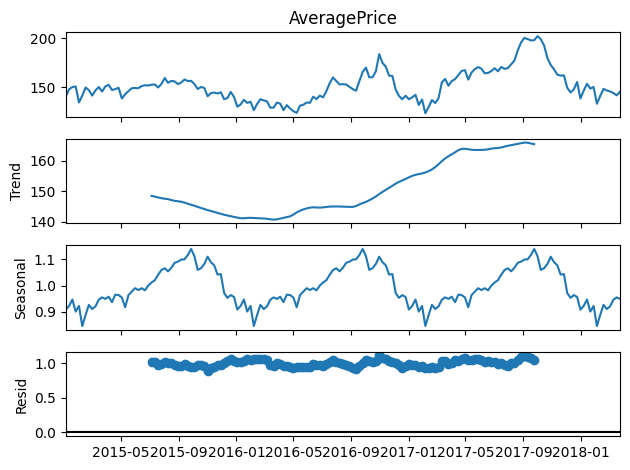

In [ ]:
dec = sm.tsa.seasonal_decompose(df1['AveragePrice'], model = 'multiplicative').plot()
plt.show();

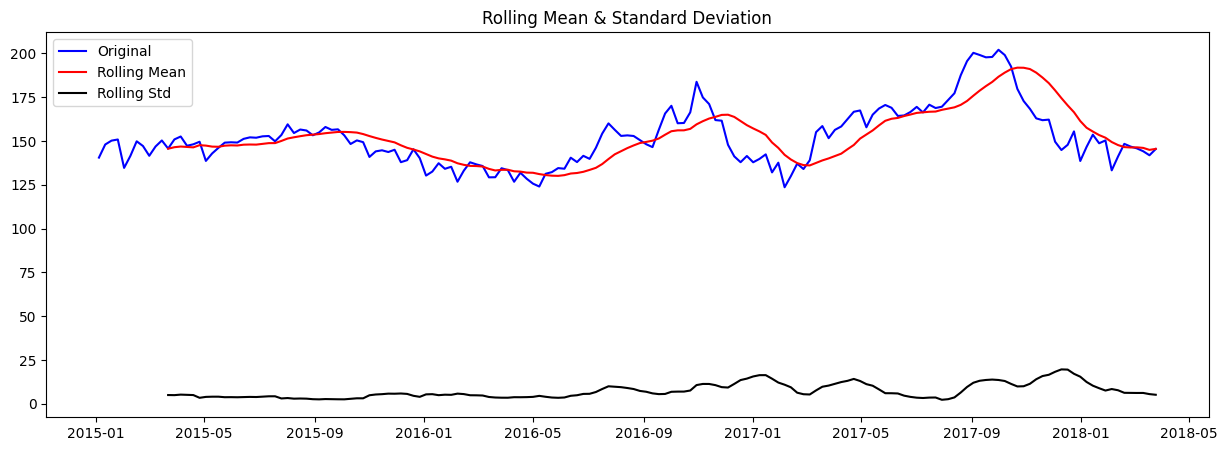

Results of Dickey-Fuller Test:
Test Statistic                 -2.36
p-value                         0.15
#Lags Used                      0.00
Number of Observations Used   168.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64


In [ ]:
test_stationarity(df1['AveragePrice'])

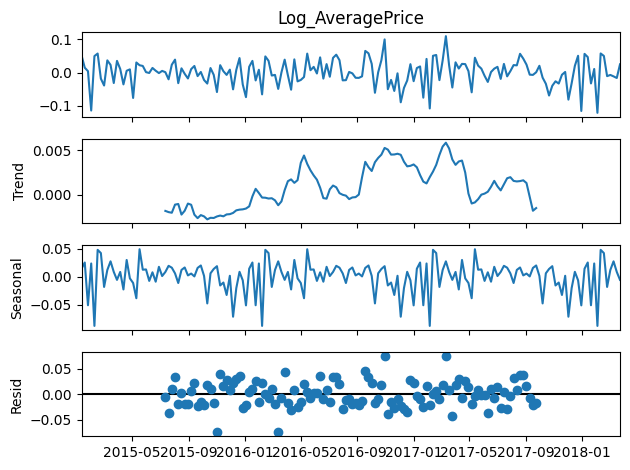

In [ ]:
df1['Log_AveragePrice'] = np.log(df1['AveragePrice'])
df1_log_diff = df1['Log_AveragePrice'].diff()
df1_log_diff = df1_log_diff.dropna()

dec = sm.tsa.seasonal_decompose(df1_log_diff,period = 52).plot()
plt.show()

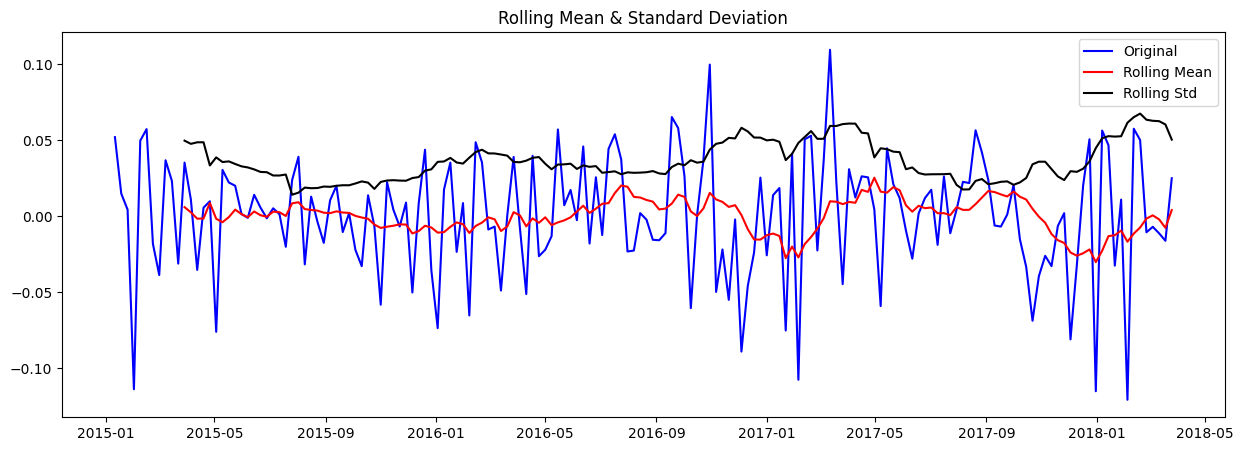

Results of Dickey-Fuller Test:
Test Statistic                -13.82
p-value                         0.00
#Lags Used                      0.00
Number of Observations Used   167.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64


In [ ]:
test_stationarity(df1_log_diff)

# Modeling

In [ ]:
!pip install autoviml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 14.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
gensim 4.3.3 requires scipy<

In [ ]:
!pip install scipy==1.7.3

  Using cached scipy-1.7.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.2 kB)
  Using cached numpy-1.22.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.0 kB)
Using cached scipy-1.7.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (39.9 MB)
Using cached numpy-1.22.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.20 requires numpy

In [ ]:
import autoviml
import pandas as pd

ValueError: sklearn.metrics._dist_metrics.DistanceMetric size changed, may indicate binary incompatibility. Expected 472 from C header, got 16 from PyObject